In [11]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [13]:
!ls

122984480.jpg			     lanscape.jpg
1M17I.png			     models
9.jpg				     opencv-seamless-cloning-example.jpg
Untitled.ipynb			     outputs
haarcascade_frontalface_default.xml  water_coins.jpg
imageRecognitionEx		     wget-log
inputs				     wood-texture.jpg
kadai2.ipynb


In [14]:
img = cv2.imread('122984480.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

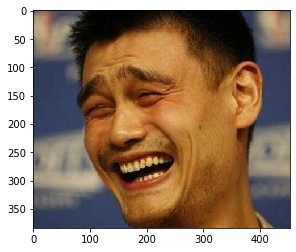

In [15]:
plt.imshow(img)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe24c5a92d0>,
 Text(0.5, 1.0, 'gray'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

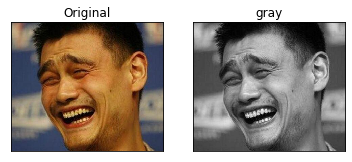

In [26]:
# 1. カラー画像を白黒画像に変換しましょう．
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.subplot(121), plt.imshow(img), plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gray,  cmap='gray'), plt.title('gray'), plt.xticks([]), plt.yticks([])


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe24c69e750>,
 Text(0.5, 1.0, 'gaussianlFilter'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

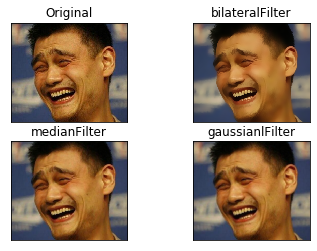

In [24]:
# 2.平滑化
blur = cv2.bilateralFilter(img,20,50,50)
blur2 = cv2.medianBlur(img,5)
blur3 = cv2.GaussianBlur(img,(5,5), 2)

plt.subplot(221), plt.imshow(img), plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(blur), plt.title('bilateralFilter'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(blur2), plt.title('medianFilter'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(blur3), plt.title('gaussianlFilter'), plt.xticks([]), plt.yticks([])

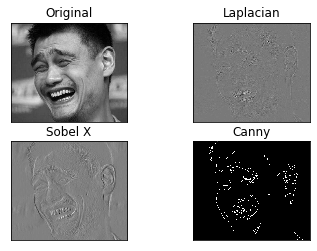

In [99]:
# 3. Sobel, Laplacian, Canny の3通りの方法でエッジ抽出
laplacian = cv2.Laplacian(gray,cv2.CV_64F)
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=3)
canny = cv2.Canny(gray, 100, 200)

plt.subplot(2,2,1),plt.imshow(gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(canny,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])

plt.show()

In [105]:
?? cv2.cvHaarDetectObjects 

Object ` cv2.cvHaarDetectObjects ` not found.


(Text(0.5, 1.0, 'probalistic'), <matplotlib.image.AxesImage at 0x7f3d949f5a10>)

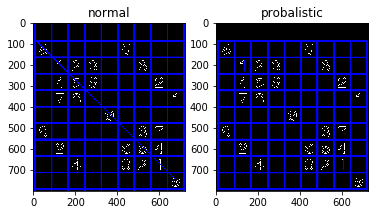

In [10]:
# 4. Hough 変換
import math

src = cv2.imread('9.jpg', cv2.IMREAD_GRAYSCALE)

# Edge detection
dst = cv2.Canny(src, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

 #  Standard Hough Line Transform
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
# print(lines)

# Draw the lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
        
# Probabilistic Line Transform
linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

# Draw the lines
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
        
# Show results
plt.subplot(121)
plt.title('normal'), plt.imshow(cdst)
plt.subplot(122)
plt.title('probalistic'),plt.imshow(cdstP)
# cv2.imshow("Source", src)
# cv2.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
# cv2.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)

#plt.imshow(dst, cmap='gray'), plt.xticks([]), plt.yticks([])




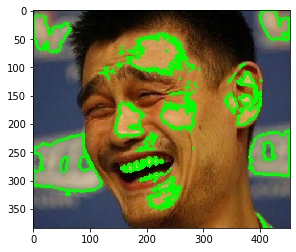

In [51]:
# 5. Snake function


import numpy as np
import cv2 as cv

img = cv.imread('122984480.jpg')
img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)

contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

cv.drawContours(img, contours, -1, (0,255,0), 3)

#cv.drawContours(img, contours, 3, (0,255,0), 3)
#cnt = contours[4]
#cv.drawContours(img, [cnt], 0, (0,255,0), 3)

plt.imshow(img, cmap = 'gray')

4.2.0
False


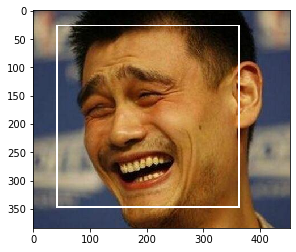

In [84]:
# 6. 顔検出：cvHarrDetectObjects を使って，顔画像検出を試してみましょう．
import cv2
#!ls 
print(cv2.__version__)
# 分類器ディレクトリ(以下から取得)
# https://github.com/opencv/opencv/blob/master/data/haarcascades/
# https://github.com/opencv/opencv_contrib/blob/master/modules/face/data/cascades/

cascade_path = './models/haarcascade_frontalface_default.xml'

# 他のモデルファイル(参考)
#cascade_path = "./models/haarcascade_frontalface_alt.xml"
#cascade_path = "./models/haarcascade_frontalface_alt2.xml"
#cascade_path = "./models/haarcascade_frontalface_alt_tree.xml"
#cascade_path = "./models/haarcascade_profileface.xml"
#cascade_path = "./models/haarcascade_mcs_nose.xml"

# 使用ファイルと入出力ディレクトリ
image_file = '122984480.jpg'
image_path = image_file
output_path = "./outputs/" + image_file

# ディレクトリ確認用(うまく行かなかった時用)
# import os
# print(os.path.exists(image_path))

#ファイル読み込み
image = cv2.imread(image_path)
image = cv.cvtColor(image, cv.COLOR_RGB2BGR)

#グレースケール変換
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#カスケード分類器の特徴量を取得する
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
print(cascade.empty())
#物体認識（顔認識）の実行
#image – CV_8U 型の行列．ここに格納されている画像中から物体が検出されます
#objects – 矩形を要素とするベクトル．それぞれの矩形は，検出した物体を含みます
#scaleFactor – 各画像スケールにおける縮小量を表します
#minNeighbors – 物体候補となる矩形は，最低でもこの数だけの近傍矩形を含む必要があります
#flags – このパラメータは，新しいカスケードでは利用されません．古いカスケードに対しては，cvHaarDetectObjects 関数の場合と同じ意味を持ちます
#minSize – 物体が取り得る最小サイズ．これよりも小さい物体は無視されます

facerect = cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=2, minSize=(30, 30))

#print(facerect)
color = (255, 255, 255) #白

# 検出した場合
if len(facerect) > 0:

    #検出した顔を囲む矩形の作成
    for rect in facerect:
        cv2.rectangle(image, tuple(rect[0:2]),tuple(rect[0:2]+rect[2:4]), color, thickness=2)

    #認識結果の保存
    cv2.imwrite(output_path, image)
    
plt.imshow(image)


(<matplotlib.image.AxesImage at 0x7f2e60d9ee90>,
 Text(0.5, 1.0, 'After'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

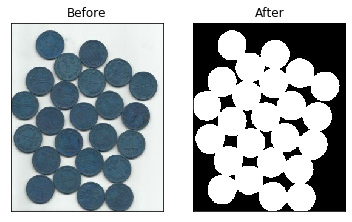

In [89]:
# 7. Domain Segmentation

img = cv2.imread('water_coins.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.subplot(121)
plt.imshow(img, cmap = 'gray'), plt.title('Before'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(thresh, cmap = 'gray'), plt.title('After'), plt.xticks([]), plt.yticks([])



(<matplotlib.image.AxesImage at 0x7fe24e9b3650>,
 Text(0.5, 1.0, 'k=8'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

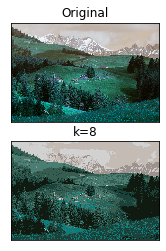

In [10]:
# 7. Domain Segmentation k-means
import numpy as np
import cv2

img = cv2.imread('lanscape.jpg')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
plt.subplot(211)
plt.imshow(img), plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(212)
plt.imshow(res2), plt.title('k=8'), plt.xticks([]), plt.yticks([])

(384, 453, 3)


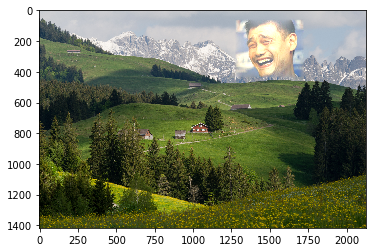

In [81]:
# 8. ポアソンブレンディング 画像合成
# Standard imports
import cv2
import numpy as np 

# Read images
src = cv2.imread("122984480.jpg", cv2.COLOR_BGR2RGB)
dst = cv2.imread("lanscape.jpg", cv2.COLOR_BGR2RGB)

src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

dst = cv2.resize(dst, (int(dst.shape[1] / 2), int(dst.shape[0] / 2)))


# Create a rough mask around the face.
src_mask = np.zeros(src.shape, src.dtype)
poly = np.array([ [0,0], [453,0], [453,384], [0, 384]], np.int32)
cv2.fillPoly(src_mask, [poly], (255, 255, 255))

# This is where the CENTER of the airplane will be placed
center = (1500,250)

print(src.shape)

# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)

plt.imshow(output)


# Save result
cv2.imwrite("opencv-seamless-cloning-example.jpg", output);
